# AGYW_PREV DATIM

In [1]:
# load the modules
from layeringOfServices import DREAMS_MASTERSHEET
#multiples outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from re import sub
from pandas import DataFrame

In [3]:
DREAMS_MASTERSHEET.init_prep.unique()
DREAMS_MASTERSHEET.new_condoms.unique()
DREAMS_MASTERSHEET.code.count()

array(['errata', 'tested_on_given_date'], dtype=object)

array(['no', 'sensOuRecu'], dtype=object)

16958

In [4]:
DREAMS_MASTERSHEET.age_range.unique()

array(['15-19', '20-24', '10-14'], dtype=object)

## AGYW_PREV

In [5]:
pipo = list(DREAMS_MASTERSHEET.agyw_period_range.unique())
pipo.append("Total")
sorted(list(DREAMS_MASTERSHEET.age_range.unique()))

['10-14', '15-19', '20-24']

In [6]:
sorted(pipo)


['13-24 months', '25+ months', 'Total']

In [7]:
class AgywPrev:
    """A class with properties and methods given the results of the indicator AGYW_PREV DATIM""" 
    __who_am_I ="DATIM"
    __datim1_title="Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package."
    __datim2_title="Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service."
    __datim3_title="Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services."
    
    def __repr__(self):
        return f"<AgywPrev {self.__i_am}>"
    
    def __str__(self):
        return f"<AgywPrev {self.__i_am}>"
    
    @classmethod
    def datim_titleI(cls):
        return cls.__datim1_title
    
    @classmethod
    def datim_titleII(cls):
        return cls.__datim2_title
    
    @classmethod
    def datim_titleIII(cls):
        return cls.__datim3_title
    
    
    def __init__(self,commune=None):
        self.__commune = commune
        self.__i_am = f"{AgywPrev.__who_am_I}"
        self.__data =  DREAMS_MASTERSHEET
        self. __total_mastersheet = self.__data.code.count()
        if self.__commune == None:
            self.__dreams_valid = self.__data
            #self.__dreams_valid = self.__data[(self.__data.timeOn_system == "required_Time_on")]
        else:
            self.__dreams_valid = self.__data[(self.__data.actual_commune == f"{self.__commune}")]
            #self.__dreams_valid = self.__data[(self.__data.timeOn_system == "required_Time_on")&(self.__data.actual_commune == f"{self.__commune}")]
        self.__total_dreams_valid = self.__dreams_valid.code.count()
        self.__dreams_valid["primary_only"] = self.__dreams_valid.apply(lambda df: self.__primFunc(df),axis=1)
        self.__dreams_valid["primary_and_OneSecondary_services"] = self.__dreams_valid.apply(lambda df: self.__primLeastOneSecFunc(df),axis=1)
        self.__dreams_valid["partial_primary_services"] = self.__dreams_valid.apply(lambda df: self.__primPartFunc(df),axis=1)
        self.__agyw_prevI = self.__dreams_valid[self.__dreams_valid.primary_only == "full_primary_only"]
        self.__agyw_prevII = self.__dreams_valid[self.__dreams_valid.primary_and_OneSecondary_services == "full_primary_leastOneSecondary"]
        self.__agyw_prevIII = self.__dreams_valid[self.__dreams_valid.partial_primary_services == "primary_part_services"]  
        self.__agyw_prevI_total = self.__agyw_prevI.code.count()
        self.__agyw_prevII_total = self.__agyw_prevII.code.count()
        self.__agyw_prevIII_total = self.__agyw_prevIII.code.count()
        self.__total_datim = self.__agyw_prevI_total + self.__agyw_prevII_total + self.__agyw_prevIII_total
        
        
    @property
    def who_am_i(self):
        return self.__i_am
    
    @property
    def data_mastersheet(self):
        return self.__data
    
    @property
    def data_dreams_valid(self):
        return self.__dreams_valid

    @property
    def total_mastersheet(self):
        return self.__total_mastersheet

    @property
    def total_dreams_valid(self):
        return self.__total_dreams_valid
    
    def __primFunc(self,df):
        if (df.ps_10_14 == "curriculum-servis" and df.hts == "errata" and df.init_prep=="errata" and df.new_condoms == "no" and df.post_care_treatment == "no" and df.socio_eco_app == "no" ): #df.condoms == "errata"
            return "full_primary_only"
        elif (df.ps_15_19 == "condoms&curriculum" and df.hts == "errata" and df.init_prep=="errata"  and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
            return "full_primary_only"
        #elif (df.ps_20_24 == "condoms&hts&curriculum"  and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
        elif (df.ps_20_24 == "condoms&curriculum" and df.hts == "errata" and df.init_prep=="errata"  and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
            return "full_primary_only"
        else:
            return "invalid"
    
    def __primLeastOneSecFunc(self,df):
        if (df.ps_10_14 == "curriculum-servis") and (df.hts == "tested_on_given_date" or df.init_prep=="tested_on_given_date" or df.new_condoms == "sensOuRecu" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        elif (df.ps_15_19 == "condoms&curriculum") and (df.hts == "tested_on_given_date" or df.init_prep=="tested_on_given_date" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        #elif (df.ps_20_24 == "condoms&hts&curriculum") and (df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
        elif (df.ps_20_24 == "condoms&curriculum") and (df.hts == "tested_on_given_date" or df.init_prep=="tested_on_given_date"  or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        else:
            return "invalid"
        
    def __primPartFunc(self,df):
        if (df.age_range == "15-19") and ((df.new_condoms == "sensOuRecu" and df.dreams_curriculum == "curriculum_inc") or (df.new_condoms == "no" and df.dreams_curriculum == "curriculum_completed")): #df.condoms == "tested_on_given_date"
            return "primary_part_services"
        #elif (df.age_range == "20-24") and ((df.dreams_curriculum == "curriculum_completed" and df.condoms=="errata" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_completed" and df.condoms=="tested_on_given_date" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_completed" and df.condoms=="errata" and df.hts=="tested_on_given_date")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="tested_on_given_date" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="errata" and df.hts=="tested_on_given_date")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="tested_on_given_date" and df.hts=="tested_on_given_date")):
        elif (df.age_range == "20-24") and ((df.new_condoms == "sensOuRecu" and df.dreams_curriculum == "curriculum_inc") or (df.new_condoms == "no" and df.dreams_curriculum == "curriculum_completed")):
            return "primary_part_services"
        else:
            return "invalid"
         
    @property
    def total_datimI(self):
        return self.__agyw_prevI_total
    
    @property
    def total_datimII(self):
        return self.__agyw_prevII_total
    
    @property
    def total_datimIII(self):
        return self.__agyw_prevIII_total
    
    @property
    def total_datim_general(self):
        return self.__total_datim
    
    @property
    def data_agyw_prevI(self):
        return self.__agyw_prevI

    @property
    def data_agyw_prevII(self):
        return self.__agyw_prevII

    @property
    def data_agyw_prevIII(self):
        return self.__agyw_prevIII

    __PERIOD_DATIM = sorted(list(DREAMS_MASTERSHEET.agyw_period_range.unique()))
    __PERIOD_DATIM.append("Total")
    __AGE_DATIM = sorted(list(DREAMS_MASTERSHEET.age_range.unique()))
    def datim_agyw_prevI(self):
        
        try:
            pivotableI = self.__agyw_prevI.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevI_pivot = pivotableI.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotI = list(agyw_prevI_pivot.columns)
            indexes_pivotI = list(agyw_prevI_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotI:
                    agyw_prevI_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotI:
                    agyw_prevI_pivot.loc[age] = 0
            agyw_prevI_pivot = agyw_prevI_pivot.reindex(index=AgywPrev.__AGE_DATIM, columns =AgywPrev.__PERIOD_DATIM)
            agyw_prevI_pivot_final = agyw_prevI_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevI_results_final = DataFrame( agyw_prevI_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevI_results_final = DataFrame({"Age":["10-14","15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevI_results_final
    
    def datim_agyw_prevII(self):
        try:
            pivotableII = self.__agyw_prevII.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevII_pivot = pivotableII.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotII = list(agyw_prevII_pivot.columns)
            indexes_pivotII = list(agyw_prevII_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotII:
                    agyw_prevII_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotII:
                    agyw_prevII_pivot.loc[age] = 0
            agyw_prevII_pivot = agyw_prevII_pivot.reindex(index=AgywPrev.__AGE_DATIM,columns =AgywPrev.__PERIOD_DATIM)            
            agyw_prevII_pivot_final = agyw_prevII_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevII_results_final = DataFrame( agyw_prevII_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevII_results_final = DataFrame({"Age":["10-14", "15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevII_results_final
    
    def datim_agyw_prevIII(self):
        try:
            pivotableIII = self.__agyw_prevIII.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevIII_pivot = pivotableIII.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotIII = list(agyw_prevIII_pivot.columns)
            indexes_pivotIII = list(agyw_prevIII_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotIII:
                    agyw_prevIII_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotIII:
                    agyw_prevIII_pivot.loc[age] = 0
            agyw_prevIII_pivot = agyw_prevIII_pivot.reindex(index=AgywPrev.__AGE_DATIM,columns =AgywPrev.__PERIOD_DATIM)
            agyw_prevIII_pivot_final = agyw_prevIII_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevIII_results_final = DataFrame( agyw_prevIII_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevIII_results_final = DataFrame({"Age":["10-14",                     "15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevIII_results_final

In [8]:
%%capture
datim = AgywPrev()

In [9]:
datim.total_mastersheet 
datim.total_dreams_valid
datim.who_am_i
datim.total_datimI
datim.total_datimII
datim.total_datimIII
datim.total_datim_general
AgywPrev.datim_titleI()
datim.datim_agyw_prevI()
AgywPrev.datim_titleII()
datim.datim_agyw_prevII()
AgywPrev.datim_titleIII()
datim.datim_agyw_prevIII()

16958

16958

'DATIM'

5219

1099

8960

15278

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,3176,938,4114
1,15-19,497,217,714
2,20-24,288,103,391


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,428,115,543
1,15-19,243,52,295
2,20-24,214,47,261


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,3461,2667,6128
2,20-24,1522,1310,2832


In [10]:
datim

<AgywPrev DATIM>

## AGYW_Prev_Commune

In [11]:
class AgywPrevCommune(AgywPrev):
    """A class that extend AgywPrev with the purpose of the indicator AGYW_PREV DATIM by commune"""
    __who_am_I ="DATIM"
    def __init__(self,name):
        self.__name = name
        self.__i_am = f"{AgywPrevCommune.__who_am_I} {self.__name}"
        #self.__data =  DREAMS_MASTERSHEET
        super().__init__(self.__name)
        
    @property
    def who_am_i(self):
        return self.__i_am
    
    def __repr__(self):
        return f"<AgywPrevCommune {self.__i_am}>"
    
    def __str__(self):
        return f"<AgywPrevCommune {self.__i_am}>"
      
        
    
        
        

        

In [12]:
DREAMS_MASTERSHEET.actual_commune.unique()

array(['Delmas', 'Port-au-Prince', 'Carrefour', 'Limonade',
       'Plaine-du-Nord', 'Cap-Haïtien', 'Kenscoff', 'Dessalines',
       'Pétionville', 'Gressier', 'Saint-Marc', 'Tabarre', 'Verrettes',
       'La Chapelle', 'Milot', 'Liancourt',
       "Petite Rivière de l'Artibonite", 'Grande Saline', 'Montrouis',
       'Desdunes', 'Quartier-Morin'], dtype=object)

## dynamic

In [13]:
%%capture
def name_handler(s):
    s = sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespace with a single dash
    s = sub(r"\s+", '_', s)
    return s

datimcommunes = []

for columns in DREAMS_MASTERSHEET.actual_commune.unique():
    globals()[f"datim_{name_handler(columns)}"] = AgywPrevCommune(f"{columns}")
    datimcommunes.append(globals().get(f"datim_{name_handler(columns)}"))
   

In [14]:
datimcommunes

[<AgywPrevCommune DATIM Delmas>,
 <AgywPrevCommune DATIM Port-au-Prince>,
 <AgywPrevCommune DATIM Carrefour>,
 <AgywPrevCommune DATIM Limonade>,
 <AgywPrevCommune DATIM Plaine-du-Nord>,
 <AgywPrevCommune DATIM Cap-Haïtien>,
 <AgywPrevCommune DATIM Kenscoff>,
 <AgywPrevCommune DATIM Dessalines>,
 <AgywPrevCommune DATIM Pétionville>,
 <AgywPrevCommune DATIM Gressier>,
 <AgywPrevCommune DATIM Saint-Marc>,
 <AgywPrevCommune DATIM Tabarre>,
 <AgywPrevCommune DATIM Verrettes>,
 <AgywPrevCommune DATIM La Chapelle>,
 <AgywPrevCommune DATIM Milot>,
 <AgywPrevCommune DATIM Liancourt>,
 <AgywPrevCommune DATIM Petite Rivière de l'Artibonite>,
 <AgywPrevCommune DATIM Grande Saline>,
 <AgywPrevCommune DATIM Montrouis>,
 <AgywPrevCommune DATIM Desdunes>,
 <AgywPrevCommune DATIM Quartier-Morin>]

In [15]:
for dcommunes in datimcommunes:
  dcommunes.total_mastersheet 
  dcommunes.total_dreams_valid
  dcommunes.who_am_i
  dcommunes.total_datimI
  dcommunes.total_datimII
  dcommunes.total_datimIII
  dcommunes.total_datim_general
  AgywPrevCommune.datim_titleI()
  dcommunes.datim_agyw_prevI()
  AgywPrevCommune.datim_titleII()
  dcommunes.datim_agyw_prevII()
  AgywPrevCommune.datim_titleIII()
  dcommunes.datim_agyw_prevIII()
  print(" ")
  print(" ")
  print(" ")
  print(" ")

16958

649

'DATIM Delmas'

170

39

420

629

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,83,35,118
1,15-19,24,11,35
2,20-24,10,7,17


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,14,5,19
1,15-19,7,7,14
2,20-24,3,3,6


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,145,108,253
2,20-24,86,81,167


16958

2657

'DATIM Port-au-Prince'

487

42

1497

2026

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,307,138,445
1,15-19,20,4,24
2,20-24,15,3,18


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,19,0,19
1,15-19,12,1,13
2,20-24,9,1,10


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,565,479,1044
2,20-24,220,233,453


16958

2035

'DATIM Carrefour'

822

82

1064

1968

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,466,117,583
1,15-19,68,107,175
2,20-24,21,43,64


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,36,26,62
1,15-19,8,1,9
2,20-24,6,5,11


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,444,274,718
2,20-24,228,118,346


16958

590

'DATIM Limonade'

124

23

364

511

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,70,42,112
1,15-19,6,5,11
2,20-24,1,0,1


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,15,3,18
1,15-19,4,0,4
2,20-24,1,0,1


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,139,131,270
2,20-24,37,57,94


16958

381

'DATIM Plaine-du-Nord'

65

14

200

279

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,63,2,65
1,15-19,0,0,0
2,20-24,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,5,0,5
1,15-19,5,0,5
2,20-24,4,0,4


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,110,31,141
2,20-24,43,16,59


16958

1034

'DATIM Cap-Haïtien'

187

27

663

877

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,133,42,175
1,15-19,4,0,4
2,20-24,7,1,8


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,22,1,23
1,15-19,2,1,3
2,20-24,1,0,1


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,185,267,452
2,20-24,56,155,211


16958

2202

'DATIM Kenscoff'

908

275

918

2101

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,564,139,703
1,15-19,118,21,139
2,20-24,58,8,66


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,69,16,85
1,15-19,76,9,85
2,20-24,88,17,105


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,383,295,678
2,20-24,121,119,240


16958

776

'DATIM Dessalines'

381

71

291

743

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,290,13,303
1,15-19,58,3,61
2,20-24,16,1,17


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,25,2,27
1,15-19,26,2,28
2,20-24,16,0,16


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,214,22,236
2,20-24,44,11,55


16958

661

'DATIM Pétionville'

135

21

447

603

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,76,54,130
1,15-19,3,1,4
2,20-24,1,0,1


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,6,2,8
1,15-19,4,4,8
2,20-24,3,2,5


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,99,195,294
2,20-24,41,112,153


16958

613

'DATIM Gressier'

208

43

274

525

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,87,33,120
1,15-19,28,30,58
2,20-24,18,12,30


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,16,8,24
1,15-19,6,2,8
2,20-24,9,2,11


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,100,73,173
2,20-24,55,46,101


16958

645

'DATIM Saint-Marc'

215

75

318

608

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,63,52,115
1,15-19,30,13,43
2,20-24,45,12,57


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,24,22,46
1,15-19,16,3,19
2,20-24,8,2,10


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,112,103,215
2,20-24,61,42,103


16958

414

'DATIM Tabarre'

140

65

209

414

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,84,41,125
1,15-19,6,3,9
2,20-24,4,2,6


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,17,7,24
1,15-19,10,9,19
2,20-24,11,11,22


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,77,81,158
2,20-24,21,30,51


16958

1290

'DATIM Verrettes'

485

94

682

1261

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,304,71,375
1,15-19,58,4,62
2,20-24,44,4,48


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,47,14,61
1,15-19,18,5,23
2,20-24,10,0,10


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,311,189,500
2,20-24,111,71,182


16958

211

'DATIM La Chapelle'

62

0

128

190

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,51,7,58
1,15-19,1,1,2
2,20-24,1,1,2


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,63,24,87
2,20-24,27,14,41


16958

146

'DATIM Milot'

37

19

46

102

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,23,1,24
1,15-19,6,0,6
2,20-24,7,0,7


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,14,1,15
1,15-19,4,0,4
2,20-24,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,32,0,32
2,20-24,13,1,14


16958

43

'DATIM Liancourt'

10

18

14

42

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,6,1,7
1,15-19,1,1,2
2,20-24,1,0,1


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,1,1,2
1,15-19,7,2,9
2,20-24,7,0,7


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,6,6,12
2,20-24,2,0,2


16958

666

"DATIM Petite Rivière de l'Artibonite"

187

36

405

628

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,75,66,141
1,15-19,21,2,23
2,20-24,20,3,23


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,12,1,13
1,15-19,10,1,11
2,20-24,11,1,12


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,76,187,263
2,20-24,35,107,142


16958

1256

'DATIM Grande Saline'

393

85

706

1184

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,294,61,355
1,15-19,20,6,26
2,20-24,10,2,12


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,45,2,47
1,15-19,14,4,18
2,20-24,19,1,20


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,287,131,418
2,20-24,226,62,288


16958

179

'DATIM Montrouis'

57

23

68

148

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,36,7,43
1,15-19,12,2,14
2,20-24,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,14,1,15
1,15-19,6,0,6
2,20-24,2,0,2


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,30,18,48
2,20-24,12,8,20


16958

421

'DATIM Desdunes'

137

47

208

392

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,100,8,108
1,15-19,13,3,16
2,20-24,9,4,13


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,13-24 months,25+ months,Total
0,10-14,27,3,30
1,15-19,8,1,9
2,20-24,6,2,8


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,83,27,110
2,20-24,82,16,98


16958

89

'DATIM Quartier-Morin'

9

0

38

47

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,13-24 months,25+ months,Total
0,10-14,1,8,9
1,15-19,0,0,0
2,20-24,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,13-24 months,25+ months,Total
0,10-14,0,0,0
1,15-19,0,26,26
2,20-24,1,11,12


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [17]:
datim.total_datim_general
target= 18000

data_plot = pd.DataFrame({"state":["Target","AGYW_PREV results"],
                            "data": [target,datim.total_datim_general]                        
})

15278

(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'AGYW_PREV datim indicator  and the periodic target')

Text(0.0, 9000.0, '18000')

Text(1.0, 7639.0, '15278')

Text(-80, -20, 'source: HIVHaiti')

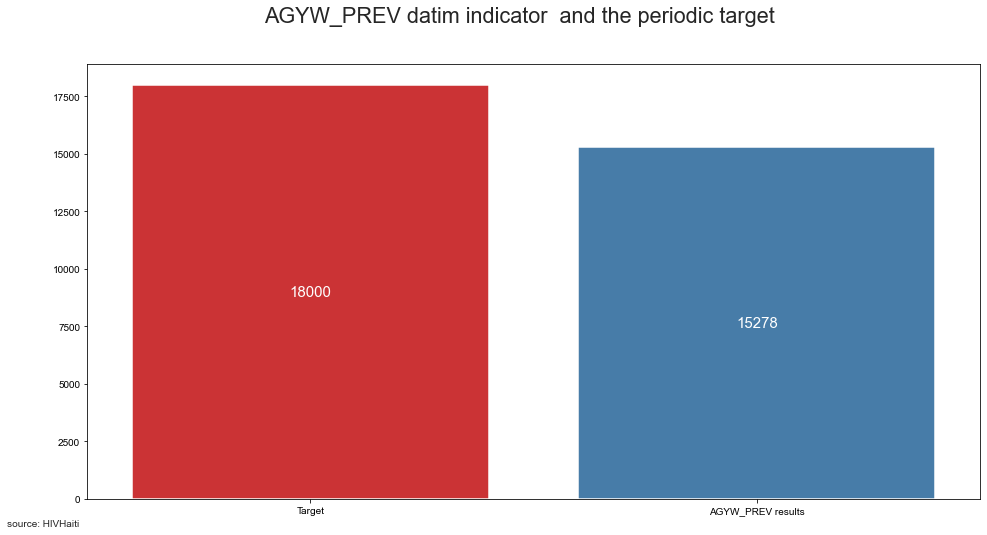

In [18]:
plt.subplots(figsize=(16,8))
sns.set_theme(style="white", context="talk")
sns.set_style("darkgrid")
sns.set_palette("Set1")
splot = sns.barplot(x="state",y="data",data=data_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW_PREV datim indicator  and the periodic target")
for p in splot.patches:
    height = p.get_height()
    plt.text(
                p.get_x() + p.get_width()/2, 
                0.5*p.get_height() + p.get_y(),
                '{:1.0f}'.format(height), 
                ha='center', va='center',
                size=15,
                fontdict=dict(color="white",fontsize=15)
            )
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("agyw_prev_evolution",dpi=1000)

In [19]:
datim.total_datimI
datim.total_datimII
datim.total_datimIII

5219

1099

8960

In [20]:
from plotnine import *

In [21]:
stack_data = pd.DataFrame( 
                  {     
                        "supp":["target","indicateur","indicateur","indicateur"],
                        "label": ["target","composante I","composante II","composante III"],
                        "data": [target,datim.total_datimI,
                                datim.total_datimII,
                                datim.total_datimIII]
                  })

stack_data


,supp,label,data
0,target,target,18000
1,indicateur,composante I,5219
2,indicateur,composante II,1099
3,indicateur,composante III,8960


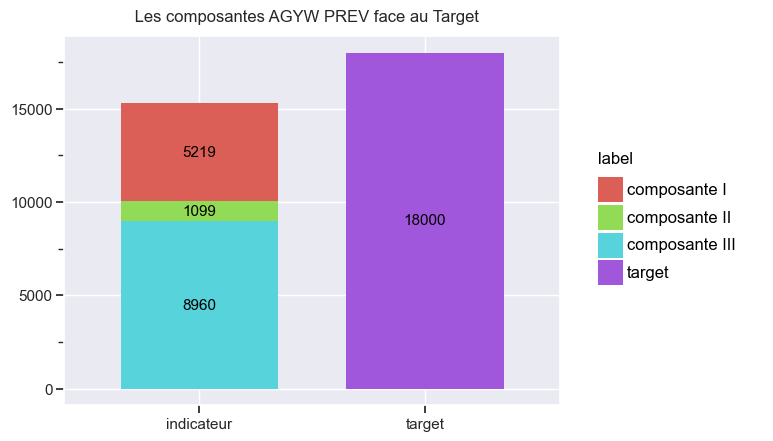

<ggplot: (117998578523)>

C:\Users\Wedner Adrien\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Wedner Adrien\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: composante_agywprev.png


In [22]:
p = (ggplot(stack_data,aes(x="supp",y="data",fill="label",width=0.7)) 
 + geom_bar(position=position_stack(vjust=0.5),stat="identity")
 + geom_text(aes(label="data"),position=position_stack(vjust=0.5))
 + ggtitle(" Les composantes AGYW PREV face au Target")
 + xlab("")
 +ylab("")
 +labs(caption =  "HIVHaiti")
 + theme_seaborn()
)
p
ggsave(plot=p,filename="composante_agywprev.png",dpi=1000)

## Les NO secondary

In [23]:
df= datim.data_dreams_valid

In [24]:
df.primary_only.unique()

array(['invalid', 'full_primary_only'], dtype=object)

In [25]:
df_prim_only = df[df.primary_only == "full_primary_only"]
df_part_primary = df[df.partial_primary_services == "primary_part_services"]
df_part_primary_no_secondary = df_part_primary[(df_part_primary.hts == "errata") & (df_part_primary.condoms == "errata") & (df_part_primary.post_care_treatment == "no") & (df_part_primary.socio_eco_app == "no")]

In [26]:
print("cohort")
total_cohort = df.code.count()
total_cohort

print("indicateur")
datim.total_datim_general

print("service primaire seulement")
total_prim_only = df_prim_only.code.count()
total_prim_only

print("Part services primaires")
total_part_primary = df_part_primary.code.count()
total_part_primary

print("Part service primaires no service secondaires")
total_part_primary_no_secondary = df_part_primary_no_secondary.code.count()
total_part_primary_no_secondary

cohort


16958

indicateur


15278

service primaire seulement


5219

Part services primaires


8960

Part service primaires no service secondaires


8181

In [27]:
data_for_MoreAGYWInfo = pd.DataFrame({
    "state":["valid cohort", "Target", "AGYW_PREV","Full primary only","Partial Primary","Partial primary no secondary"],
    "data":[total_cohort,18000,datim.total_datim_general,total_prim_only,total_part_primary,total_part_primary_no_secondary]
    
})

(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'Visualization of the AGYW with no secondary services')

Text(0.0, 8479.0, '16958')

Text(1.0, 9000.0, '18000')

Text(2.0, 7639.0, '15278')

Text(3.0, 2609.5, '5219')

Text(4.0, 4480.0, '8960')

Text(5.0, 4090.5, '8181')

Text(-80, -20, 'source: HIVHaiti')

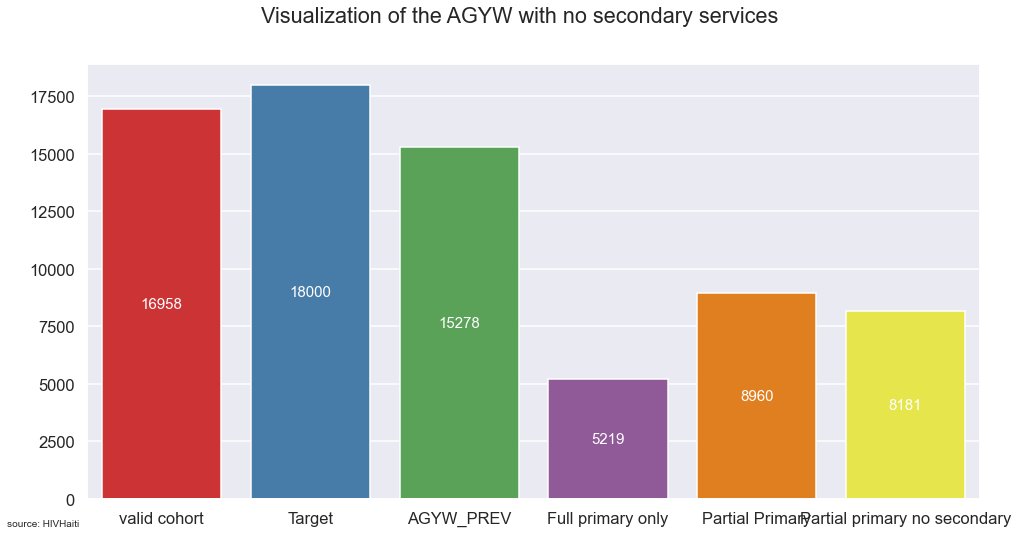

In [28]:
plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="state",y="data",data=data_for_MoreAGYWInfo)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("Visualization of the AGYW with no secondary services")
for p in splot.patches:
    height = p.get_height()
    plt.text(
                p.get_x() + p.get_width()/2, 
                0.5*p.get_height() + p.get_y(),
                '{:1.0f}'.format(height), 
                ha='center', va='center',
                size=15,
                fontdict=dict(color="white",fontsize=15)
            )
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("agyw_prev_with_no_secondary",dpi=1000)

In [29]:
df_part_primary_no_secondary.to_excel("part_primary_no_secondary.xlsx",index=False,na_rep="NULL")
df_prim_only.to_excel("primary_only.xlsx",index=False,na_rep="NULL")